In [34]:
import os
import datetime
import requests

import brownie

from utils.network_utils import connect_eth_alchemy
from utils.contract_utils import init_contract

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [33]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
connect_eth_alchemy()

In [3]:
vlcvx_addr = "0xD18140b4B819b895A3dba5442F959fA44994AF50"

In [4]:
current_block = brownie.web3.eth.block_number

In [5]:
query = f"https://api.etherscan.io/api?module=account&action=txlist&address={vlcvx_addr}&startblock=0&endblock=9999999999&sort=asc&page=1&offset=10000&apikey={os.environ['ETHERSCAN_API_KEY']}"
response = requests.post(query)

In [6]:
interacting_addrs = []
for tx in dict(response.json())['result']:
    interacting_addrs.append(tx['from'])
len(interacting_addrs)

4117

In [7]:
vlcvx = init_contract(vlcvx_addr)

In [28]:
vlcvx_balances = []
with brownie.multicall():
    for addr in interacting_addrs:
        vlcvx_balances.append(vlcvx.lockedBalanceOf(addr))

In [29]:
df_vlcvx_balances = pd.DataFrame({"addr": interacting_addrs, "vlcvx_balance": vlcvx_balances})
df_vlcvx_balances

,addr,vlcvx_balance
0,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
1,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
2,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
3,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
4,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
...,...,...
4112,0x67f118166ba2745656f99ea58d62c002c26cca18,460893083453391134568
4113,0x535051520c4ce3e2bfb3f609251b34a497ce343f,878546142449240350306
4114,0xae30debe2ce8258523938b44d2adbc4d6805ab38,37134556859962955386
4115,0x89f40ca416df2cb2fda79c3f5d9338e87cab0600,15693239487430347484291


In [30]:
df_vlcvx_balances = df_vlcvx_balances.where(df_vlcvx_balances.vlcvx_balance > 0)
df_vlcvx_balances['vlcvx_balance'] *= 1e-18
df_vlcvx_balances.drop_duplicates(inplace=True)
df_vlcvx_balances

,addr,vlcvx_balance
0,NaN,NaN
5,0xaac0aa431c237c2c0b5f041c8e59b3f1a43ac78f,1717677.369072
6,0x94dfce828c3daaf6492f1b6f66f9a1825254d24b,547261.932749
7,0xc7c022bd85529bed1b92de4ba847f3f4e8fd5cbf,499973.912018
8,0x2ba8c59c99c94ac5d3b2af7019d2861c640e91f7,6568.236533
...,...,...
4098,0xfd4ae564e8ec836c4c61903ddf9acc9529000170,3918.086746
4099,0xe1f7ead40d33eef30dcf15eb5efc45409001aab8,131.713055
4103,0xd43e13e7d3afbffd739c3ddb5e0cb7e680b59185,103.762
4109,0xbcf19445c92ab292a9b8374ab5091efabd417b67,660.1205


In [31]:
export_df = df_vlcvx_balances.dropna().sort_values(by=['vlcvx_balance'], ascending=False).reset_index().drop(columns=['index'])
export_df

,addr,vlcvx_balance
0,0xaac0aa431c237c2c0b5f041c8e59b3f1a43ac78f,1717677.369072
1,0x9c5083dd4838e120dbeac44c052179692aa5dac5,1000000.002648
2,0xa22eb3338dfd69458513a1f6d4742ab29f7ef333,1000000.0
3,0xb3df5271b92e9fd2fed137253bb4611285923f16,775043.652014
4,0x94dfce828c3daaf6492f1b6f66f9a1825254d24b,547261.932749
...,...,...
2073,0x94234cfd63e20f280111daf8627c95c0ab2c3ac7,2.218662
2074,0xe16f4f24fbc389441a83222b6fe7c61a1b0d50ff,1.470637
2075,0x25b28ee7f335f0396f41f129039f1583345b21b8,1.222147
2076,0xff77fdef2685402f9064cd14ae24aa4609d8d867,1.0


In [32]:
now = datetime.datetime.utcnow().date
export_df.to_csv(f'vlcvx_balances_{now}.csv')

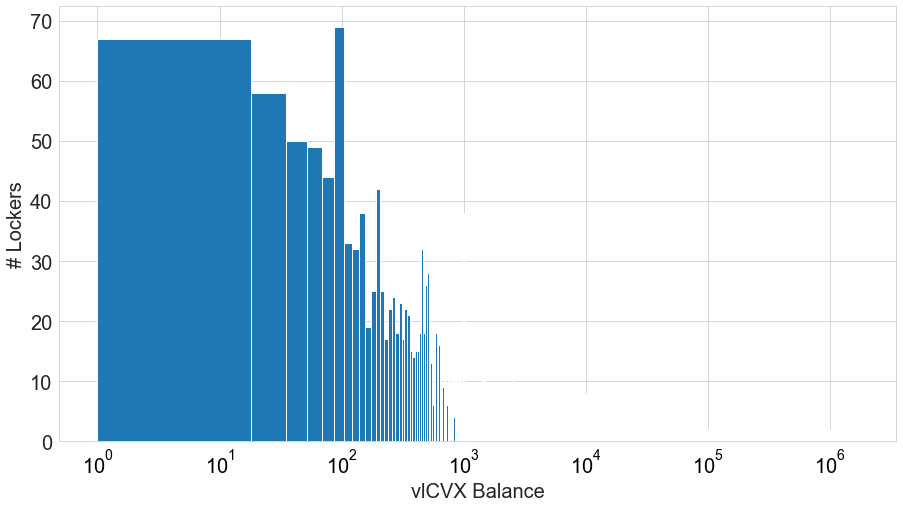

In [54]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.hist(export_df.vlcvx_balance, bins=100000)

ax.set_ylabel("# Lockers", fontsize=20)
ax.set_xlabel("vlCVX Balance", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

ax.set_xscale("log")
